['office', 'highway', 'pedestrians', 'PETS2006']

In [2]:
import numpy as np
import cv2
import tqdm
import os
import torch

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
cats = os.listdir("/home/wg25r/fastdata/dataset")

os.makedirs(f"/home/wg25r/fastdata/CDNet/histograms/", exist_ok=True)
def process(cat_video):
    cat, video = cat_video
    frames = os.listdir(f"/home/wg25r/fastdata/dataset/{cat}/{video}/input/")
    frames = sorted(frames)
    frame0 = cv2.resize(cv2.imread(f"/home/wg25r/fastdata/dataset/{cat}/{video}/input/{frames[0]}"), (256, 256))
    volume = np.zeros((len(frames), frame0.shape[0], frame0.shape[1], 3), np.uint8)
    for i, frame in enumerate(tqdm.tqdm(frames)):
        tmp = cv2.resize(cv2.imread(f"/home/wg25r/fastdata/dataset/{cat}/{video}/input/{frame}"), (256, 256))
        volume[i] = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  
    counts = torch.zeros((255//5, volume.shape[1], volume.shape[2], volume.shape[3]), dtype=torch.uint8).cuda()
    print(".")
    volume_quantized = torch.tensor(volume).cuda() // 5
    for i in tqdm.tqdm(range(255//5)):
        counts[i] = torch.sum(volume_quantized == i, dim=0)
    
    torch.save(counts, f"/home/wg25r/fastdata/CDNet/histograms/{cat}_{video}.pt") 
    
cats = {cat: os.listdir(f"/home/wg25r/fastdata/dataset/{cat}") for cat in os.listdir("/home/wg25r/fastdata/dataset")}
arg_group = []
for cat in cats:
    for dataset in cats[cat]: 
        arg_group.append((cat, dataset))
        
from multiprocessing import Pool
# with Pool(100) as p: 
#     p.map(process, arg_group)
for arg in arg_group:
    process(arg)

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:05<00:00, 593.46it/s]


.


100%|██████████| 4000/4000 [00:05<00:00, 694.29it/s]


.


100%|██████████| 1500/1500 [00:00<00:00, 1620.87it/s]


.


100%|██████████| 900/900 [00:01<00:00, 823.63it/s]


.


100%|██████████| 4500/4500 [00:04<00:00, 1080.06it/s]


.


100%|██████████| 2500/2500 [00:01<00:00, 1423.82it/s]


.


100%|██████████| 2500/2500 [00:02<00:00, 1165.43it/s]


.


100%|██████████| 3200/3200 [00:02<00:00, 1277.38it/s]


.


100%|██████████| 2750/2750 [00:01<00:00, 1481.11it/s]


.


100%|██████████| 3200/3200 [00:03<00:00, 1038.61it/s]


.


100%|██████████| 1200/1200 [00:00<00:00, 1270.76it/s]


.


100%|██████████| 1570/1570 [00:01<00:00, 1568.92it/s]


.


100%|██████████| 1150/1150 [00:01<00:00, 609.54it/s]


.


100%|██████████| 2500/2500 [00:01<00:00, 1256.94it/s]


.


100%|██████████| 3900/3900 [00:04<00:00, 932.27it/s]


.


100%|██████████| 7000/7000 [00:09<00:00, 739.76it/s]


.


100%|██████████| 6500/6500 [00:09<00:00, 686.65it/s]


.


100%|██████████| 3500/3500 [00:06<00:00, 572.12it/s]


.


100%|██████████| 2050/2050 [00:01<00:00, 1465.54it/s]


.


100%|██████████| 1700/1700 [00:01<00:00, 1385.92it/s]


.


100%|██████████| 1099/1099 [00:00<00:00, 1503.02it/s]


.


100%|██████████| 1200/1200 [00:03<00:00, 309.37it/s]


.


100%|██████████| 1499/1499 [00:01<00:00, 998.68it/s]


.


100%|██████████| 4000/4000 [00:09<00:00, 425.00it/s]


.


100%|██████████| 7999/7999 [00:06<00:00, 1327.89it/s]


.


100%|██████████| 3000/3000 [00:02<00:00, 1300.80it/s]


.


100%|██████████| 1189/1189 [00:00<00:00, 1373.49it/s]


.


100%|██████████| 1184/1184 [00:01<00:00, 1061.24it/s]


.


100%|██████████| 4900/4900 [00:02<00:00, 1672.31it/s]


.


100%|██████████| 3700/3700 [00:02<00:00, 1673.83it/s]


.


100%|██████████| 5400/5400 [00:03<00:00, 1690.17it/s]


.


100%|██████████| 600/600 [00:01<00:00, 318.35it/s]


.


100%|██████████| 6500/6500 [00:03<00:00, 1677.10it/s]


.


100%|██████████| 4500/4500 [00:04<00:00, 920.97it/s]


.


100%|██████████| 5000/5000 [00:08<00:00, 601.97it/s]


.


100%|██████████| 2200/2200 [00:03<00:00, 633.70it/s]


.


100%|██████████| 4000/4000 [00:06<00:00, 628.38it/s]


.


100%|██████████| 1785/1785 [00:02<00:00, 788.87it/s]


.


100%|██████████| 2500/2500 [00:03<00:00, 802.44it/s]


.


100%|██████████| 3000/3000 [00:03<00:00, 975.61it/s]


.


100%|██████████| 5200/5200 [00:03<00:00, 1364.96it/s]


.


100%|██████████| 1364/1364 [00:01<00:00, 716.71it/s]


.


100%|██████████| 2760/2760 [00:03<00:00, 787.00it/s]


.


100%|██████████| 1250/1250 [00:00<00:00, 1393.13it/s]


.


100%|██████████| 1199/1199 [00:00<00:00, 1262.98it/s]


.


100%|██████████| 7400/7400 [00:05<00:00, 1404.37it/s]


.


100%|██████████| 3400/3400 [00:05<00:00, 590.74it/s]


.


100%|██████████| 1700/1700 [00:01<00:00, 1383.58it/s]


.


100%|██████████| 2000/2000 [00:01<00:00, 1389.21it/s]


.


100%|██████████| 1700/1700 [00:03<00:00, 542.72it/s]


.


100%|██████████| 2300/2300 [00:02<00:00, 978.51it/s] 


.


100%|██████████| 1130/1130 [00:00<00:00, 1165.67it/s]


.


100%|██████████| 3500/3500 [00:04<00:00, 705.82it/s]


.


100%|██████████| 51/51 [00:00<00:00, 14311.20it/s]


In [ ]:
counts = np.zeros((255//5, volume.shape[1], volume.shape[2], volume.shape[3]))
volume_quantized = volume // 5
for i in range(255//5):
    counts[i] = np.sum(volume_quantized == i, axis=0)

In [78]:
counts.shape

(51, 240, 360, 3)

In [50]:
np.digitize(volume, bins = np.arange(0, 255, 10))

array([[[[ 8, 10,  9],
         [ 8, 10,  9],
         [ 8, 11,  9],
         ...,
         [18, 19, 17],
         [19, 20, 18],
         [20, 21, 19]],

        [[ 8, 10,  9],
         [ 8, 11,  9],
         [ 8, 11,  9],
         ...,
         [20, 21, 19],
         [20, 21, 19],
         [21, 22, 19]],

        [[ 8, 10,  9],
         [ 8, 11,  9],
         [ 8, 11,  9],
         ...,
         [20, 22, 19],
         [20, 22, 19],
         [20, 22, 19]],

        ...,

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 2,  3,  4],
         [ 2,  3,  3],
         [ 2,  2,  3]],

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 2,  3,  4],
         [ 2,  3,  3],
         [ 2,  2,  3]],

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 2,  3,  4],
         [ 2,  3,  3],
         [ 2,  2,  3]]],


       [[[ 8, 10,  9],
         [ 8, 10,  9],
         [ 8, 

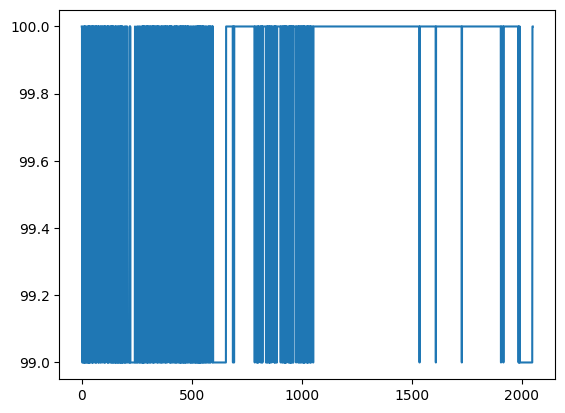

In [ ]:
import pylab
pylab.plot(volume[np.digitize(volume, bins = np.arange(0, 255, 10))])